<a href="https://colab.research.google.com/github/kshitija-kumar/movie/blob/main/Copy_of_movie_suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')


Model Loaded


def embed(texts):
    return model(texts)

In [ ]:
def embed(texts): return model(texts)
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549279,  0.02886906, -0.02628897,  0.04502158, -0.01233335,
         0.02568329, -0.00071882, -0.05447304,  0.04221928, -0.0191371 ,
         0.02710011, -0.04328045, -0.02486858,  0.0135952 ,  0.00482793,
        -0.05379638,  0.01630707,  0.02139907,  0.02644024, -0.02320251,
         0.06569218, -0.10137626, -0.01691998,  0.02492482,  0.02406815,
        -0.03139618, -0.03265484, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868447,  0.04380691, -0.02071748, -0.01873296, -0.03071439,
         0.01825575,  0.03627162,  0.01321464,  0.0094349 , -0.03006625,
         0.06655685,  0.01529936, -0.10101432, -0.00671943, -0.01578641,
         0.04991001,  0.02548564,  0.05454975, -0.01658573,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997448,
         0.04206816, -0.04119828, -0.00768586, -0.05101158,  0.01210047,
        -0.01673209, -0.01382073,  0.00373702,  0.04911597, -0.03481682,
 

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path="/content/drive/MyDrive/dataset/aitest.csv"

df = pd.read_csv(path, engine="python")
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [ ]:
df = df[["original_title", "overview"]]
df.head()


,original_title,overview
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...
1,Eternals,The Eternals are a team of ancient aliens who ...
2,Dune,"Paul Atreides, a brilliant and gifted young ma..."
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...
4,Free Guy,A bank teller called Guy realizes he is a back...


In [ ]:
df = df.dropna()
df = df.reset_index()
df = df[:5500]

In [ ]:
titles = list(df['overview'])
titles[:2]

['After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.',
 'The Eternals are a team of ancient aliens who have been living on Earth in secret for thousands of years. When an unexpected tragedy forces them out of the shadows, they are forced to reunite against mankind’s most ancient enemy, the Deviants.']

In [ ]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (5500, 512)


In [ ]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

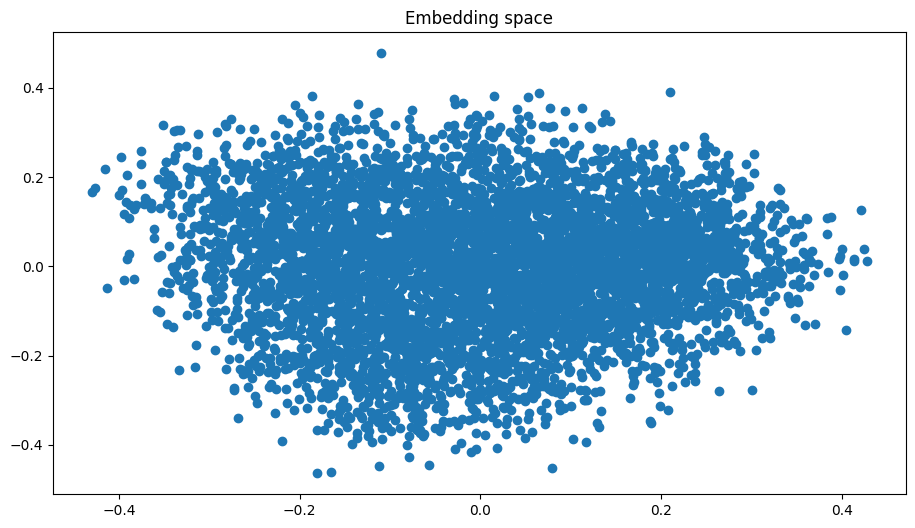

In [ ]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
nn = NearestNeighbors(n_neighbors=15)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=15)

In [ ]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['original_title'].iloc[neighbors].tolist()

In [ ]:
print('Recommended Movies:')
recommend("romance")


Recommended Movies:


['High Flying Romance',
 'Tentacles',
 '가장 보통의 연애',
 'Friendzone',
 '(500) Days of Summer',
 'Chemical Hearts',
 "Valentine's Day",
 '굿바이 썸머',
 'The Holiday',
 'The Lake House',
 'Romeo + Juliet',
 'The Kissing Booth',
 'To All the Boys: P.S. I Still Love You',
 'Tengo ganas de ti',
 'Letters to Juliet']